In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc
import io
import requests

url1 = "https://raw.githubusercontent.com/LBukai/IAU_project/master/other_train.csv"
url2 = "https://github.com/LBukai/IAU_project/blob/master/other_train.csv"

db1 = requests.get(url1).content
train = pd.read_csv(io.StringIO(db1.decode('utf-8')))
#train = pd.read_csv("https://github.com/LBukai/IAU_project.git")
#personal_train = pd.read_csv()

In [19]:
train

,Unnamed: 0,name,address,kurtosis_oxygen,pregnant,education-num,relationship,skewness_glucose,mean_glucose,std_oxygen,capital-gain,skewness_oxygen,kurtosis_glucose,personal_info,education,fnlwgt,class,std_glucose,income,mean_oxygen,hours-per-week,capital-loss
0,0,Milton Stamper,"145 Autumn Manor\r\nNew Michael, NE 83039",10.177006,f,10.0,Unmarried,2.445834,87.835938,16.616788,0.0,114.800226,0.563505,Sales|United-States\r\r\n?? -- Private|Black,Some-college,398843.0,0.0,36.762706,<=50K,1.984114,35.0,0.0
1,1,Michael Pope,"41479 Kelly Locks Apt. 061\r\nSuarezmouth, AK ...",19.674691,f,13.0,Husband,0.763944,140.343750,9.774889,0.0,444.481793,0.047948,Prof-specialty|United-States\r\r\nMarried-civ-...,Bachelors,293535.0,0.0,42.872164,>50K,0.638796,40.0,0.0
2,2,Leonard Buckley,"0646 Adam Grove\r\nNew Jennifershire, NH 95027",9.009352,f,8.0,Not-in-family,0.023184,112.632812,13.678551,0.0,117.517856,0.403222,Transport-moving|United-States\r\r\nDivorced -...,12th,156612.0,0.0,52.333944,<=50K,2.458194,40.0,0.0
3,3,Ricky Paterson,430 Joseph Stravenue Suite 773\r\nSouth Jaclyn...,9.119079,FALSE,10.0,Not-in-family,-0.566705,128.390625,16.570603,0.0,102.301339,0.003284,Exec-managerial|United-States\r\r\nWidowed -- ...,Some-college,208431.0,0.0,54.439794,<=50K,2.672241,32.0,0.0
4,4,John Fontaine,"379 Rodriguez Inlet\r\nFisherbury, MD 83114",0.303268,f,13.0,Own-child,16.967138,37.226562,45.169221,0.0,0.675770,3.643543,Adm-clerical|United-States\r\r\n?? -- State-go...,Bachelors,270218.0,1.0,33.252635,<=50K,132.556020,40.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,3978,John Mcneely,00547 Fuentes Squares Suite 736\r\nNew Kenneth...,8.797682,f,10.0,Not-in-family,0.961030,146.710938,19.859244,0.0,84.500027,0.190713,Sales|United-States\r\r\nnan -- Private|White,Some-college,196278.0,0.0,41.346507,<=50K,2.650502,40.0,0.0
3979,3979,Lonnie Grimshaw,"848 Bautista Loaf Apt. 958\r\nMatthewtown, VA ...",10.256116,f,10.0,Own-child,1.611029,77.781250,15.652941,0.0,121.852175,0.760278,Prof_specialty|United-States\r\r\nNever-marrie...,Some-college,325179.0,0.0,41.385561,<=50K,1.889632,50.0,0.0
3980,3980,Miguel Williams,"PSC 1474, Box 2402\r\nAPO AE 13323",18.157320,f,10.0,Unmarried,-0.151965,132.976562,11.269939,0.0,354.366039,0.055109,?|United-States\r\r\nNever-married -- ?|White,Some-college,30237.0,0.0,51.832734,<=50K,0.714883,40.0,0.0
3981,3981,Walter Spencer,"620 Andrews Stream Apt. 835\r\nNorth Markland,...",3.514654,f,10.0,Not-in-family,1.883394,110.882812,44.242265,0.0,11.214745,0.586854,Other-service|United-States\r\r\nNever-married...,Some-college,238685.0,0.0,38.252986,<=50K,12.603679,32.0,0.0


In [20]:
#Basic description of data dimensions.
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3983 entries, 0 to 3982
Data columns (total 22 columns):
Unnamed: 0          3983 non-null int64
name                3983 non-null object
address             3983 non-null object
kurtosis_oxygen     3962 non-null float64
pregnant            3970 non-null object
education-num       3970 non-null float64
relationship        3970 non-null object
skewness_glucose    3967 non-null float64
mean_glucose        3965 non-null float64
std_oxygen          3970 non-null float64
capital-gain        3969 non-null float64
skewness_oxygen     3970 non-null float64
kurtosis_glucose    3964 non-null float64
personal_info       3970 non-null object
education           3964 non-null object
fnlwgt              3970 non-null float64
class               3969 non-null float64
std_glucose         3972 non-null float64
income              3970 non-null object
mean_oxygen         3969 non-null float64
hours-per-week      3968 non-null float64
capital-loss        

The dataset have 22 dimensions (columns)
Dimensions are
1.   The position in the datase
2.   The name of the person [first name last, name]
3.   Oxigen peakedness 
4.   Is the person pregnant. {error. interchangable boolean FALSE / f used}
5.   Education indicator
7.   Relationship indicator
8.   glucose indicator











In [27]:
#type of entries in the column pregnant
pd.unique(train['pregnant'])

array(['f', 'FALSE', 't', 'F', nan, 'TRUE', 'T'], dtype=object)

There are 7 unique types of entries:

If the person is not pregnant the entry can be: "f", "F" or "FALSE"

In case that the person is pregnant the entry can be: "t", "T" or "TRUE"

For some person there is no information these entries are "non"

In [28]:
#type of entries in the column pregnant
pd.unique(train['relationship'])

array([' Unmarried', ' Husband', ' Not-in-family', ' Own-child', ' Wife',
       ' Other-relative', nan], dtype=object)

There are 7 different enries in the relationship column

In [29]:
#typ of entries in the column income
pd.unique(train['income'])

array([' <=50K', ' >50K', nan], dtype=object)

In [52]:
#correlation between the education and the capital gain
degree_captail = (train.groupby(['education']).mean()).sort_values(by='capital-gain')
degree_captail

,Unnamed: 0,kurtosis_oxygen,education-num,skewness_glucose,mean_glucose,std_oxygen,capital-gain,skewness_oxygen,kurtosis_glucose,fnlwgt,class,std_glucose,mean_oxygen,hours-per-week,capital-loss
education,,,,,,,,,,,,,,,
1st-4th,2301.368421,7.765739,2.0,3.392352,100.018914,32.789404,0.000000,107.225183,0.942774,224298.842105,0.263158,-355.348881,20.890248,34.105263,206.000000
Preschool,2846.000000,6.987394,1.0,10.412520,92.916016,32.598619,0.000000,62.407392,1.459759,291248.250000,0.250000,41.059904,30.009197,45.333333,429.750000
9th,2212.126761,8.304566,5.0,3.469963,104.973041,27.510060,45.788732,109.079129,0.794537,180894.971831,0.183099,-161.224253,16.691896,37.507042,0.000000
7th-8th,1930.468750,7.367253,4.0,3.873016,103.582764,31.887100,127.750000,90.340369,0.905099,176937.239583,0.250000,-135.182569,16.817700,39.375000,55.093750
10th,1893.837209,7.060414,6.0,3.827329,102.692345,32.306050,137.515625,83.781326,0.894988,196401.542636,0.286822,50.587716,20.497388,35.193798,58.507812
5th-6th,2142.880952,8.146507,3.0,3.614566,103.588542,26.515877,173.761905,101.679278,0.832740,230359.833333,0.243902,-209.807806,11.625378,41.571429,173.642857
11th,1904.197080,7.783536,7.0,3.927491,103.362226,28.114591,217.861314,92.893973,0.844080,200491.240876,0.218978,10.449314,13.674011,31.722628,16.941606
HS-grad,2008.945513,7.545610,9.0,3.899526,101.482500,30.442487,355.674960,94.460332,0.904804,189312.030449,0.245981,90.041227,18.474506,40.783307,63.246586
Assoc-acdm,1683.585938,7.754967,12.0,2.850064,105.421631,29.928938,461.367188,96.243594,0.724759,186917.578125,0.187500,-100.929906,13.734133,41.656250,58.086614


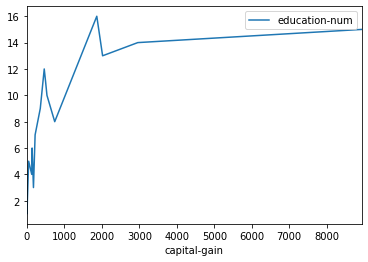

In [55]:
ax = plt.gca()

degree_captail.plot(kind='line',y='education-num',x='capital-gain',ax=ax)
#train.plot(kind='line',x='education-num',y='capital-gain', color='red', ax=ax)

As higher the degree of the education rises so does the captial. There is slight correlation between the educatin and the years of education. Only a smaller diversion between it.

